In [1]:
load("results.RData") #saved results after running "code.R"


#otherwise (7 hours on 3 cores approx)
#source("code.R")

--- 
Project for the course in Computational Statistics | Summer 2021, M.Sc. Economics, Bonn University | Aida Takhmazova

# Evaluating Performance of Bayesian Classification Trees for High-Dimentional Prediction  <a class="tocSkip">   
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Description-of-The-Methods" data-toc-modified-id="2.-Description-of-The-Methods-2">2. Description of The Methods</a></span></li><li><span><a href="#3.-Description-of-The-Simulation-Set-Up" data-toc-modified-id="3.-Description-of The-Simulation-Set-Up-3">3. Description of The Simulation Set-Up</a></span></li><li><span><a href="#4.-Simualtion-Results" data-toc-modified-id="4.-Simualtion-Results-4">4. Simualtion Results</a></span></li><li><span><a href="#5.-Empirical-Application" data-toc-modified-id="5.-Empirical-Application-5">5. Empirical Application</a></span></li>  <li><span><a href="#6.-Conclusion" data-toc-modified-id="6.-Conclusion-6">6. Conclusion</a></span></li> <li><span><a href="#7.-References" data-toc-modified-id="7.-References-7">7. References</a></span></li><li><span><a href="#8.-Appendix" data-toc-modified-id="8.-Appendix-8">8. Appendix</a></span></li>

---
# 1. Introduction
---

Facing classification and regression tasks, ensembles of decision trees are a commonly used tool for reaching highly accurate predictions.  Particularly, random forests (Breiman 2001) is one of the most commonly used supervised machine learning methods.
When it comes to high-dimensional settings, random forests tend to behave well, however, some limitations may happen when $P$, the number of predictors, is much larger than the number of observations $N$.  To address the high-dimensionality recently several promising probabilistically motivated methods based on ensembles of decision trees have been proposed. So-called Bayesian approaches (Chipman, George, and McCulloch 1998; Denison, Mallick, and Smith 1998) model the unknown function as the realization of a random tree. Ensemble of decision trees in this approach is obtained through posterior averaging.


According to the literature, there is no clear signal favoring a particular method regarding the suitability of commonly used decision tree procedures with the high-dimensional data. On the one hand, in practice tools such as random forests often yield excellent predictions, with reports that they are robust to the presence of irrelevant predictors (Statnikov, Wang, and Aliferis 2008; Menze et al. 2011). On the other hand, Biau (2012) and Scornet et al. (2015) showed analytically that, for fixed $P$ and diverging $N$, the convergence rate for some types of random forests does not depend on the number of irrelevant predictors. Nevertheless, Zhu et al. (2015) showed that unmodified variants of the random forest algorithm perform suboptimally when $P$ is of comparable order to $N$.

Returning to Bayesian approaches, Linero (2018) proposed a modified version of Bayesian additive regression trees (BART). He argues that instead of choosing predictors uniformly at random, as in Bayesian approach, choosing the probabilities to come from a Dirichlet distribution would induce more sparsity. Thus, the BART with the Dirichlet splitting rule prior is labeled as DART, standing for Dirichlet additive regression trees. Therefore, DART was promised by Linero to be resilient to the presence of large numbers of nuisance predictors attaining adaptivity to sparsity within the Bayesian framework in a computationally simple manner.


Therefore, in the present simulation study, I focus on the classification task for a high-dimensional setting in order to evaluate the performance of the beforementioned, BART DART and RF, methods. For a binary response $y$, I consider the model

$$P(Y = 1|x) = F(f(x)),\mbox{ }x\in\mathbb{R}^P$$
where $F$ denotes the standard Logistic CDF (logit link) or the standard Normal CDF (probit link). The goal is to have very flexible inference for the unknown function $f$. The main assumption throughout the study is the sparsity assumption that $f(x)$ depends on $x$ only through ($x_q : q ∈ Q_0$) where $Q_0 ⊆ \{1, . . . , P\}$ and the size of $Q_0$, $Q_0$ is assumed to be much smaller than $P$.

The methods are evaluated on both the simulated and real data. As for the real data, I apply the methods for the microarray data. DNA microarray data provide the opportunity to assess the expression levels for thousands of genes simultaneously. One of the uses of this information is to classify cancer tumors. Researches indicate that gene expression profiling based on DNA microarray can offer potential and independent prognostic information in patients with newly diagnosed cancer (Rhodes DR et al., 2004; Trevino, V., Falciani, F., & Barrera-Saldaña, H. A., 2007). For example, Gravier et al. (2010) have considered small, invasive ductal carcinomas without axillary lymph node involvement (T1T2N0) to predict metastasis of small node-negative breast carcinoma. The data from Gravier et al. (2010) is used in this study to evaluate the performance of the chosen methods. The simulated data is thus generated as closely as possible to real microarray datasets based on available technical tools.


The methods with the choice of the parameters justified by existing literature show that the results might be controversial. In the simplified cases for the DNA data, BART and DART seem to yield the best performance. On the other hand, in the complex data cases with large networks as well as in the case with the real data RF outperforms both BART and DART.


The paper is organized as follows. Section 2 gives details of the methodology for the chosen approaches. Description of the Simulation Set-Up is given in Section 3. In Sections 4 and 5 I show the results on the evaluation of the methods on the simulated and real data respectively. Section 6 then concludes.

---
# 2. Description of The Methods
---

\In the following subsections, I provide descriptions for the methods that were chosen for comparison: Bayesian Additive Regression Trees (BART) and its modification Dirichlet Additive Regression Trees (DART). Random Forest (RF) is chosen as a baseline for comparison for the reasons of its common usage.

### BART (Chipman, George, and McCulloch, 2010)
In short, BART is a Bayesian “sum-of-trees” model. In the spirit of “ensemble models”, each tree is constrained by a prior to be a weak learner so that it contributes a small amount to the overall fit.


The function $f_0(x)$ is modeled as the realization
of a random sum of decision trees $f(x)$ given by

$$f(x)=\sum\limits_{t=1}^T\tau_t(x)$$

Each tree $\tau_t(x)$ is determined by a binary tree structure $S_t$ consisting of the topology and splitting rules of the tree, and a vector $\mu_t$ of parameters associated with the terminal nodes of $S_t$ such that $\tau_t(x)=\mu_{tl}$ if $x$ is associated with the terminal node $l$ of tree $t$.

The models then are based on the following prior for all $f(x)$. Each binary tree structure $S_t$ is generated independently in the following manner. Let $q(d):\mathbb{N}\rightarrow [0,1]$. We initialize $S_t$ as a tree with a single node at depth $d=0$. This node is then given two child nodes of depth $d+1$ with probability $q(d)$ and is terminal otherwise. This process iterates for the nodes at depths $d=1,2,...$ untill all nodes are terminal. A common choice for $q(d)$ is 
$$q(d)=\frac{\gamma}{(1+d)^\beta},\mbox{ }\gamma\in(0,1),\mbox{ }\beta\in[0,\infty)$$.

In simulations as well as in the application to the microarray dataset I set $\gamma=0.75$ and $\beta=10$ as these parameters were chosen based on Chipman, George, and McCulloch (2010) as well as on the results of the warm-up iterations.

To each node, we assign a splitting rule of the form $[x_j\leq C]$. Each $x$ associated with this internal node is then associated with one of its children according to whether $x$ satisfies the splitting rule or not. 


The predictor used to construct a splitting rule is chosen according to the probability vector $s=(s_1,...,s_p)$. By default, existing Bayesian decision trees typically fix $s_j=P^{-1}$ or $s\sim D(1,...,1)$, one argument being that this provides a non-informative prior on $S_t$.There are several probabilities for the distribution of $C$ given that predictor $j$ is chosen to construct the splitting rule. Most implementations of BART draw $C$ uniformly from the collection of observed values $X_{1j},...,X_nj$ that lead to a rule which does not contradict any splitting rule higher in the tree. If no such rule exists, the new predictor is drawn according to $s$ and the same procedure applies. The node becomes terminal when it is impossible to construct a nontrivial splitting rule. 

Finally, associated with each terminal node $l$ in the tree, we draw a mean parameter $\mu_{tl}\sim N(0,\sigma_mu^2/T)$ where $T$ is the number of trees in the ensemble.



### DART (Linero, 2018)



However, Linero (2018) argues that in a high-dimensional setting it is generally impossible to construct priors that are "non-informative". Linero claims that seemingly non-informative choices of priors actually convey dogmatic information which is the case if one takes $s_j=P^{-1}$ or $s\sim D(1,...,1)$ and troubling behavior occurs when $P$ is large.

As $P\rightarrow\infty$, the prior quickly concentrates on models in which $r$ predictors (where $r$ is the number of splitting rules in the ensemble) are included, the maximal number possible. Thus, rather than expressing ignorance about the ensemble, these priors express a preference for models that are highly non-sparse, with each included predictor accounting for as small a proportion of the signal as possible.

Linero believes that while seemingly a minor modification of the typical prior on Bayesian decision trees, the prior

$$(s_1,...,s_p)\sim D(\frac{\alpha}{P},...,\frac{\alpha}{P})$$
induces drastically behavior than fixing $s_j=P^{-1}$ or setting $s\sim D(1,...,1)$. In particular, the preference for nonsparse models with low-signal predictors is removed.

The choice of $\alpha$ is highly important now as it plays a central role in determining the degree of sparsity the model expects. One approach is to place a prior on $\alpha$. This allows for the data to determine an appropriate degree of sparsity. We consider priors of the form

$$\frac{\alpha}{\alpha+\rho}\sim Beta(a,b)$$
for some hyperparameters $(a,b,\rho)$. Following the authors I set $b=1$ and $\rho=P$. With respect to the choice of $a$ it is important to note that the smaller $a$ the more it favors sparsity. Therefore, in my simulations and data I set $a=1$ following the authors choice and results of warm-up iterations. Number of trees were also fixed for BART and DART according to obseravtions by Linero.


### Parameter settings

* Parameters for RF were chosen based on  Zhu et al. (2015). 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-9m7n{background-color:#000000;border-color:#ffffff;color:#333333;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-9m7n">Method</th>
    <th class="tg-0pky">Parameters</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-fymr">BART (implementated in r package "BART")</td>
    <td class="tg-0pky">ntrees=20 , $\gamma$=0.75, $\beta$=10</td>
  </tr>
  <tr>
    <td class="tg-fymr">DART (implementated in r package "BART")</td>
    <td class="tg-0pky">ntrees=50 , $\gamma$=0.75, $\beta$=10, $\rho$=P, a=1, b=1</td>
  </tr>
  <tr>
    <td class="tg-fymr">RF (implementated in r package "randomForest")</td>
    <td class="tg-0pky">ntrees=500, mtry=P, nodesize = $n^{1/3}$</td>
  </tr>
</tbody>
</table>

---
# 3. Description of The Simulation Set-Up
---

Motivated by the application for microarray data I use the R package "Umpire" (Zhang, J., Roebuck, P. L., & Coombes, K. R., 2012)  to produce a realistic set-up for the simulation study. 


“Ultimate Microarray Prediction, Inference, and Reality Engine” (Umpire) is a package composed of gene expression simulation tools. The authors' model incorporates both biological and technical noise on top of the true signal, transcriptional status, and block structures that mimic gene networks. More importantly, to simulate the multi-hit model of cancer development, their tool contains latent variables that link gene expression with binary outcomes. In the following subsections (i-ii) I follow Zhang, J., Roebuck, P. L., & Coombes, K. R. (2012) on choosing specifications and parameters' values.


### i. Homogenous Gene Expression Model
This subsection contains the description of the underlying statistical model for simulating gene expression data that is implemented in the Umpire package.

#### i.A. Additive and Multiplicative Noise
The observed signal ,$Y_{gi}$, for gene $g$ in sample $i$ is:

$$Y_{gi}=exp(H_{gi})S_{gi}+E_{gi}$$
where $S_{g_i}$ is true bilogical signal,  $H_{g_i}$ is multiplicative noise and $E_{g_i}$ is additive noise. Additive and multiplicative noise are modeled as normal distributions with the following parameters:

$$E_{gi}\sim N(10,20)$$
$$H_{gi}\sim N(0,0.1)$$
#### i.B. Active and Inactive Genes
The true biological signal $S_{gi}$ is modeled as a mixture:

$$S_{gi}\sim (1-z_g)\delta_o+z_gT_{gi}$$
where $\delta_0$ is a point mass at 0, $z_g$ defines the activity state (1 = active, 0 = inactive) and $T_{gi}$ is the expression of a transcriptionally active gene. Activity is modeled in Umpire using a binomial distribution, $z_g ∼ Binom(p_0)$.

#### i.C. Expression Distributions
The expression, $T_{gi}$, of a transcriptionally active gene follows a log-normal distribution, $log(T_g) ∼ Normal(µ_g, σ_g)$.

Both $µ_g$ and $σ_g$ are properties of the gene itself and the sample class. Within a given simulation, I place the hyper distribution on the log-normal parameters $µ_g$ and $σ_g$ with the following hyperparameters:

$$µ_g \sim N(6,1.5)$$

$$µ_g \sim N(28.11,44.25)$$



#### i.D. Correlated blocks of genes
It is natural to simulate microarray experiments from the perspective that genes are usually interconnected in networks and pathways, thus, in correlated blocks. In simulations, it is usually allowed the mean block size, $ξ$, to range from 1 to 1000, and the sizes of gene blocks to vary around the pre-defined mean block size. Namely, the block size follows a normal distribution $N(ξ,0.3ξ)$. The case $ξ = 1$ stands for the case when all genes are independent. At the other extreme, $ξ = 1000$ simulates large networks involving many genes. Thus, taking into account the computational costs, I allow parameter $ξ$ to vary with values equal to 5, 15 and 30.



The correlation matrix $\Omega_b$ for a block $b$ has 1's on the diagonal and $\rho_b$ of the diagonal with $\rho\sim Beta(pw,(1 − p)w)$ and parameters $p=0.6$ and $w=5$.


The log expression values of genes within a block follow a multivariate normal (MVN) distribution. The mean vector is defined by $µ_g$ as defined previously, and the covariance matrix $Σ$ is defined as:

$$Σ_{i,j} = Ω_{i,j} ∗ σ_{gi} ∗ σ_{gj}$$
where $σ_{gi}$ defines the standard deviation of gene $i$, which follows the inverse gamma distribution as described previously.

As mentioned above, some genes would be transcriptionally inactive under certain biological conditions. Instead of simulating this active status for genes individually, whole blocks of genes are simulated as being transcriptionally active or inactive with 70% of genes being active. That models the idea that the entire pathway or network could be turned on or off under certain biological conditions.



### ii. Multi-Hit Model of Cancer
The multiple-hit theory of cancer was first proposed by Carl Nordling in 1953 and extended by Alfred Knudson in 1971. The basic idea of the multiple-hit theory of cancer (C. Nordlin, 1953; A. Knudson, 1971) is that cancer can only result after multiple insults (mutations; hits) to the DNA of a cell. The "Umpire" package uses the combinatorics of multiple hits to simulate heterogeneity in the population.

Let $H$ be the number of possible hits (typically on the order of 10 to 20). In simulation experiment I fix $H=20$. The mean size of the block parameter $ξ$, thus, directly affects $P$ and $ξ=5,15,30$ is associated with $P≈600$, $P≈1500$ and $P≈3500$ respectively.
A cancer subtype is defined as a collection of hits (in simulations only one subtype is considered as most real data focus on one particular subtype). In the simplest scenario employed in the simulation study, each subtype is equally likely to occur in the population. 

To simulate a set of patients, first of all, they are assigned to one of the cancer subtypes (with probabilities equal to the prevalences). Individual hits are then used as (unobserved) latent variables that influence gene expression and binary outcomes.

Specifically, let $Z_h$ be a binary variable that indicates the presence ($Z_h = 1$) or absence ($Z_h = 0$) of a hit $h$.
Then the probability $p$ of an unfavorable (binary) outcome is simulated from the logistic model


$$log(\frac{p}{1-p})=\sum\limits_{h=1}^H\beta_iZ_i$$
where $\beta_i\sim N(0,\sigma_B)$


Finally, each hit is assumed to affect the expression of one correlated block of genes (representing the effect on a single biological pathway) by altering the mean expression of the genes in that block. The absolute change of the mean expression values on a log scale for a block of genes is given by $\Delta g \sim Gamma(10, 10)$. A gene in the changed block is randomly assigned to be up-regulated or down-regulated in cancer patients.





---
# 4. Simualtion Results
---

I evaluate BART, DART and RF under several simulation settings:

* As mentioned in Section 3, I consider different mean sizes of the blocks ($ξ$) which I will now refer as $sb$ with $sb=5,15,30$. However, $sb$ directly affects $P$ ($P≈600, 1500,3500$, respectively) in the simulated microarrays. Thus, the change in the mean size of the blocks can be also refered as the different dimentions setting. Nevertheless, it will not only cover the precision of the microarray but also the assumptions about the size of the networks.

* The number of observations $N$ is varied with $N=50,100,200$ as there are typically no more observations in microarray data (Lavine, B. K., Davidson, C. E., & Rayens, W. S., 2004).


For evaluation metrics, I considered the precision, recall, and F1 scores, given by prec = TP/(TP + FP), rec = TP/(TP + FN), and F1 = 2 · prec · rec/(prec + rec), respectively, where TP number of outcomes where the model correctly predicts the positive class, FP number of outcomes where the model falsely predicts the positive class and FN denotes the number of outcomes where the model falsely predicts the negative class. The F1 score is often used as an overall summary that balances precision and recall. The test set always contain 100 observations, the simulations repeated 100 times for each setting and the results are averaged (in the cases where it was possible to calculate the suggested measures; accuracy is taken as control measure because it can be calculated in every case) over 100 runs.



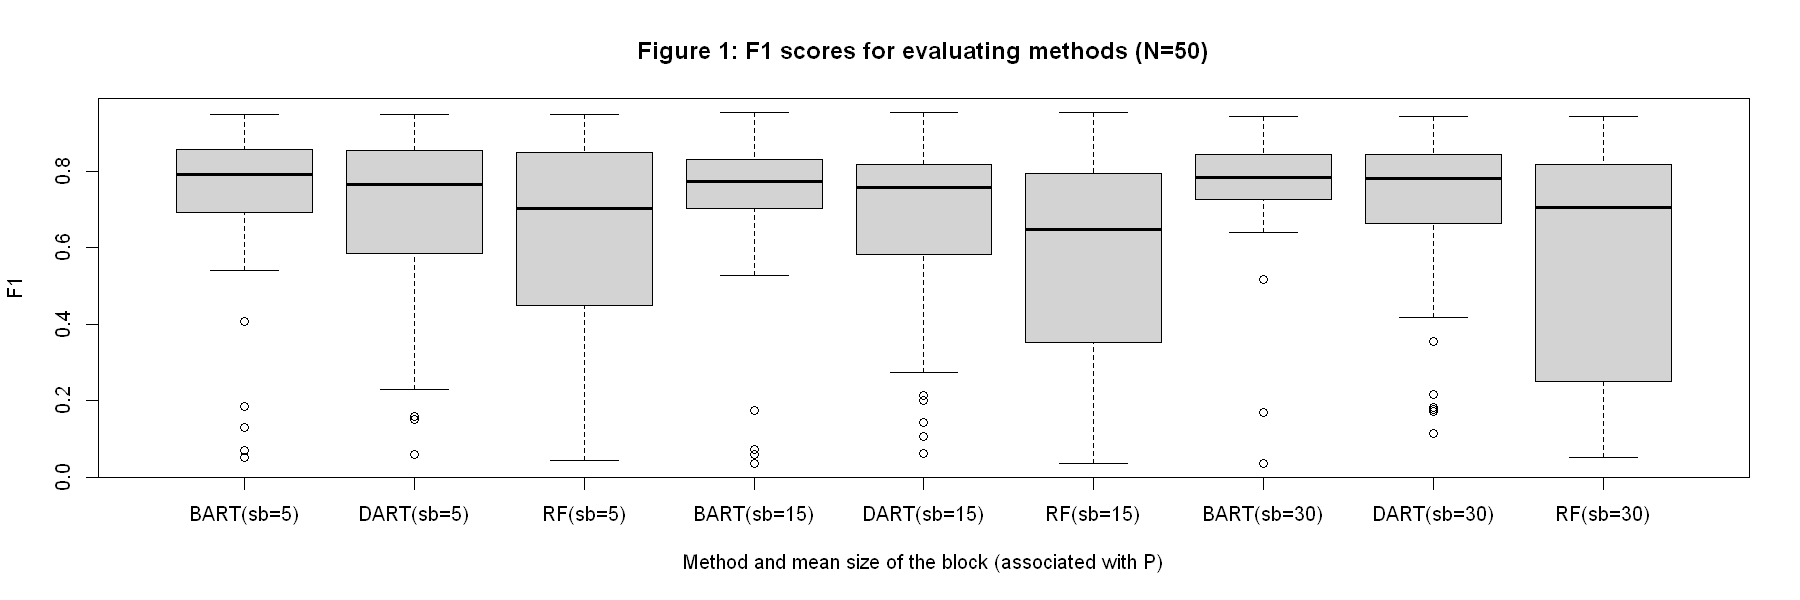

In [2]:
options(repr.plot.width=15, repr.plot.height=5)
boxplot(ev5$F1BART[1:100],ev5$F1DART[1:100],ev5$F1RF[1:100],
        ev15$F1BART[1:100],ev15$F1DART[1:100],ev15$F1RF[1:100],
        ev30$F1BART[1:100],ev30$F1DART[1:100],ev30$F1RF[1:100],
        names = c("BART(sb=5)", "DART(sb=5)", "RF(sb=5)",
        "BART(sb=15)", "DART(sb=15)", "RF(sb=15)",
        "BART(sb=30)", "DART(sb=30)", "RF(sb=30)"),
       main="Figure 1: F1 scores for evaluating methods (N=50)",
        ylab="F1",
        xlab="Method and mean size of the block (associated with P)")

***Figure 1*** shows the F1 score results for the case when $N=50$ (***Figure 2*** and ***Figure 3*** for case when $N=100$ and $N=200$ can be found in the Appendix). It is seen that BART seems to have the best performance irregardless of the size of the networks or number of dimensions. Nevertheless, DART is very close in its performance. With the increase in the number of dimensions, the difference between BART/DART and RF becomes less obvious as RF seems to perform not much worse than BART or DART. 

However, fixing the sample size, BART and DART are more stable in their performance than RF across different $P$. From ***Figure 1*** it is seen that the interval between the minimum and maximum performance is the biggest for RF and the smallest for BART. The same tendency is observed when $N=100$ and $N=200$.

##### Table 1: Results of the simulation study for sb = 5 and associated P  ≈ 600. The best result for each category is inside exclamation points.

In [3]:
result_table(simulations_res5)

,N=50,,,,N=100,,,,N=200,,,
,recall,precision,F1,accuracy,recall,precision,F1,accuracy,recall,precision,F1,accuracy
BART,0.5513,! 0.6342 !,! 0.7363 !,! 0.6614 !,! 0.4982 !,! 0.6201 !,! 0.7067 !,! 0.6455 !,0.4975,! 0.5784 !,! 0.6596 !,0.6332
DART,! 0.5515 !,0.6326,0.6921,0.6603,0.4941,0.5805,0.6408,0.6429,! 0.5119 !,0.5727,0.646,! 0.6373 !
RF,0.5392,0.5771,0.6281,0.6579,0.497,0.5427,0.5533,0.6337,0.5018,0.5484,0.5826,0.6306


According to ***Table 1*** in the case of small networks BART outperforms DART when the number of observations small but when $N=200$ DART achieves the highers F1 score. All the methods, including RF, show the best performance when $N=50$.

##### Table 2: Results of the simulation study for sb = 30 and associated P  ≈ 3500. The best result for each category is inside exclamation points.

In [4]:
result_table(simulations_res30)

,N=50,,,,N=100,,,,N=200,,,
,recall,precision,F1,accuracy,recall,precision,F1,accuracy,recall,precision,F1,accuracy
BART,0.5378,! 0.6499 !,! 0.7614 !,! 0.6625 !,0.5864,! 0.6332 !,! 0.7427 !,0.6478,0.4951,! 0.6189 !,! 0.7025 !,0.65
DART,0.5296,0.6407,0.7178,0.6583,! 0.5918 !,0.6185,0.6905,! 0.6483 !,0.492,0.6004,0.6832,0.6484
RF,! 0.5385 !,0.5809,0.577,0.6519,0.5738,0.6038,0.6436,0.6457,! 0.5078 !,0.5998,0.6151,! 0.6529 !


***Table 2*** provides the results on the case with large networks and higher number of predictors. It is seen that in this case RF competing with DART and BART with proposed by the literature parameters. RF achieves the best recall for $N=50$ and $N=200$. Nevertheless, BART still achieves the highest F1 score for any number of observations. ***Table 3*** with the results on the medium size of the networks can be found in the Appendix.

To sum up, BART proved to be the most stable method across different settings. Although DART was promised to be an adaptation of the BART method for high-dimensional data, it performs slightly worse than BART. RF seems to achieve performance close to BART and DART, however, its performance turned out to be less stable for the simulated data.

---
# 5. Empirical Application
---

I illustrate BART and DART on the dataset from paper by Gravier et al. (2010). Using comparative genomic hybridization arrays, they examined 168 patients over a five-year period. The 111 patients with no event after diagnosis were labelled good, and the 57 patients with early metastasis were labelled poor.


BART and DART were evaluated by a ten-fold cross-validation estimate for precision, recall and F1 score defined as previously. The averaged results are presented in ***Table 4***.

##### Table 4: Performance on the dataset N = 168,  P  = 2905. The best result for each category is inside exclamation points.

In [5]:
CV_results

,recall,precision,F1,accuracy
BART,0.19,! 0.9375 !,0.3676,0.7124
DART,0.2433,0.6648,0.4082,0.6945
RF,! 0.61 !,0.9083,! 0.7022 !,! 0.8327 !


Although BART achieves the highest precision, RF outperforms both methods according to F1 score. This partly supports the finding in the simulation study for large networks (RF was shown to have the highest recall). However, BART and DART seem to be significantly worse than RF in terms of F1 score. Nevertheless, comparing the results by accuracy, the difference in the performance of the methods is not that dramatic. Combined with high values for precisions and small values for recall, this means that BART/DART performed as a biased predictor and predicted mostly negative classes.

---
# 6. Conclusion
---

In this study, I demonstrated the performance of Bayesian Classification Trees for high-dimensional prediction with complex data structures forming biological pathways. In simulations, BART proved to have the best performance in most of the settings whereas DART mostly outperformed BART in the cases with small sizes of the networks. Unfortunately, for the closest to real data case with larger networks RF seemed to perform better as well as on the real data. Nevertheless, BART and DART showed more stable performance compared to RF across all of the settings.


Although BART and DART methodologies provide suitable theoretical applicability for the high-dimensional setting the results of the simulation study as well as application on the real data set show that the RF methodology can outperform BART and DART in the case of large networks. The parameters for BART and DART for this study were chosen according to the existing literature and justified theoretically. Nevertheless, the results show that it might be the case that these parameters should be treated as tuning parameters and selected by cross-validation. However, the choice of the tuning parameters was out of the scope for this study and might be suggested as a future direction to study.

---
# 7. References
---

* Biau, G. (2012). Analysis of a random forests model. The Journal of Machine Learning Research, 13, 1063-1095.


* Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.


* Chipman, H. A., George, E. I., & McCulloch, R. E. (2010). BART: Bayesian additive regression trees. The Annals of Applied Statistics, 4(1), 266-298.



* Chipman, H. A., George, E. I., & McCulloch, R. E. (1998). Bayesian CART model search. Journal of the American Statistical Association, 93(443), 935-948.




* Denison, D. G., Mallick, B. K., & Smith, A. F. (1998). A bayesian cart algorithm. Biometrika, 85(2), 363-377.


* Gravier, E., Pierron, G., Vincent‐Salomon, A., Gruel, N., Raynal, V., Savignoni, A., ... & Delattre, O. (2010). A prognostic DNA signature for T1T2 node‐negative breast cancer patients. Genes, chromosomes and cancer, 49(12), 1125-1134.




* Lavine, B. K., Davidson, C. E., & Rayens, W. S. (2004). Machine learning based pattern recognition applied to microarray data. Combinatorial chemistry & high throughput screening, 7(2), 115-131.





* Linero, A. R. (2018). Bayesian regression trees for high-dimensional prediction and variable selection. Journal of the American Statistical Association, 113(522), 626-636.


* Menze, B. H., Kelm, B. M., Splitthoff, D. N., Koethe, U., & Hamprecht, F. A. (2011, September). On oblique random forests. In Joint European Conference on Machine Learning and Knowledge Discovery in Databases (pp. 453-469). Springer, Berlin, Heidelberg.



* Rhodes, D. R., Yu, J., Shanker, K., Deshpande, N., Varambally, R., Ghosh, D., ... & Chinnaiyan, A. M. (2004). Large-scale meta-analysis of cancer microarray data identifies common transcriptional profiles of neoplastic transformation and progression. Proceedings of the National Academy of Sciences, 101(25), 9309-9314.


* Scornet, E., Biau, G., & Vert, J. P. (2015). Consistency of random forests. The Annals of Statistics, 43(4), 1716-1741.

* Statnikov, A., Wang, L., & Aliferis, C. F. (2008). A comprehensive comparison of random forests and support vector machines for microarray-based cancer classification. BMC bioinformatics, 9(1), 1-10.


* Trevino, V., Falciani, F., & Barrera-Saldaña, H. A. (2007). DNA microarrays: a powerful genomic tool for biomedical and clinical research. Molecular Medicine, 13(9), 527-541.



* Zhang, J., Roebuck, P. L., & Coombes, K. R. (2012). Simulating gene expression data to estimate sample size for class and biomarker discovery. Int. J. Adv. Life Sci, 4, 44-51.


* Zhu, R., Zeng, D., & Kosorok, M. R. (2015). Reinforcement learning trees. Journal of the American Statistical Association, 110(512), 1770-1784.




---
# 8. Appendix
---

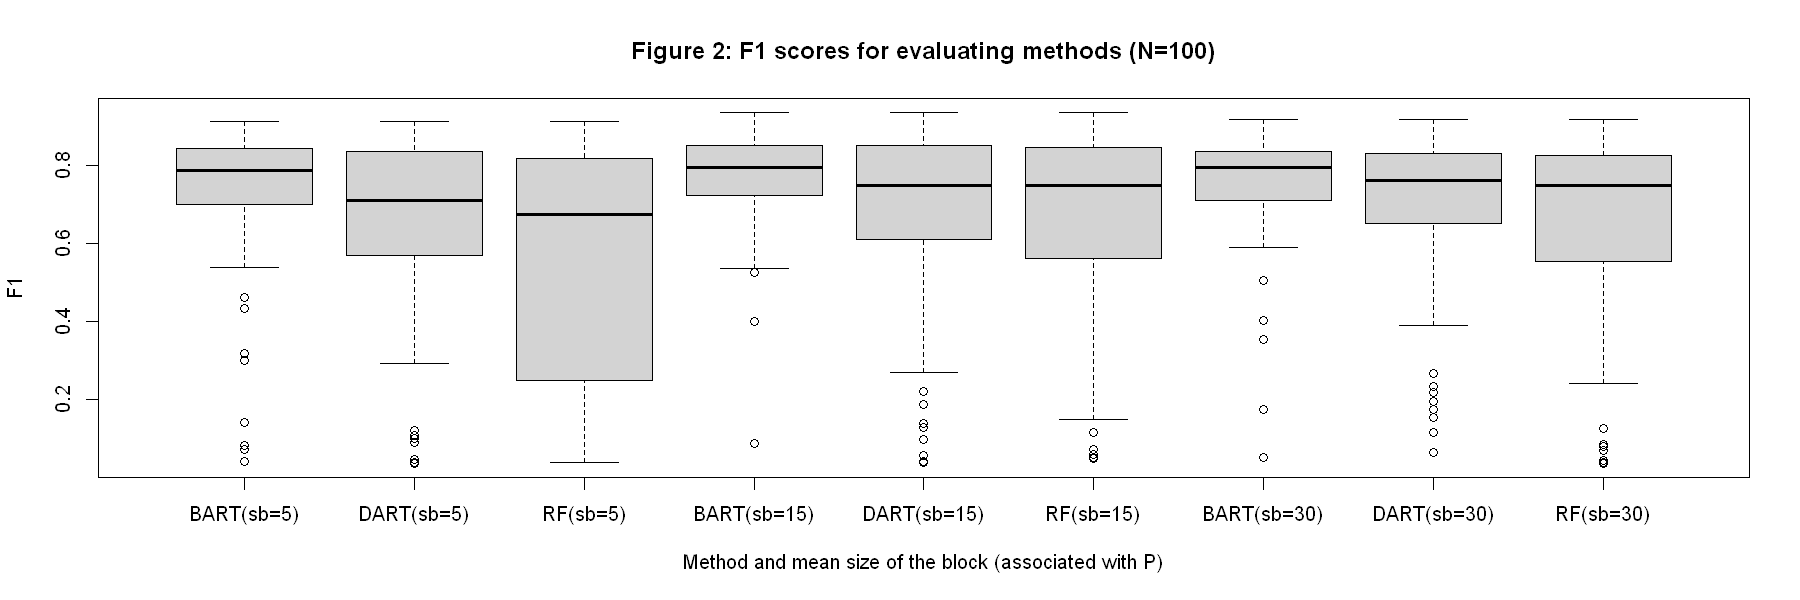

In [6]:
boxplot(ev5$F1BART[101:200],ev5$F1DART[101:200],ev5$F1RF[101:200],
        ev15$F1BART[101:200],ev15$F1DART[101:200],ev15$F1RF[101:200],
        ev30$F1BART[101:200],ev30$F1DART[101:200],ev30$F1RF[101:200],
        names = c("BART(sb=5)", "DART(sb=5)", "RF(sb=5)",
        "BART(sb=15)", "DART(sb=15)", "RF(sb=15)",
        "BART(sb=30)", "DART(sb=30)", "RF(sb=30)"),
       main="Figure 2: F1 scores for evaluating methods (N=100)",
        ylab="F1",
        xlab="Method and mean size of the block (associated with P)")

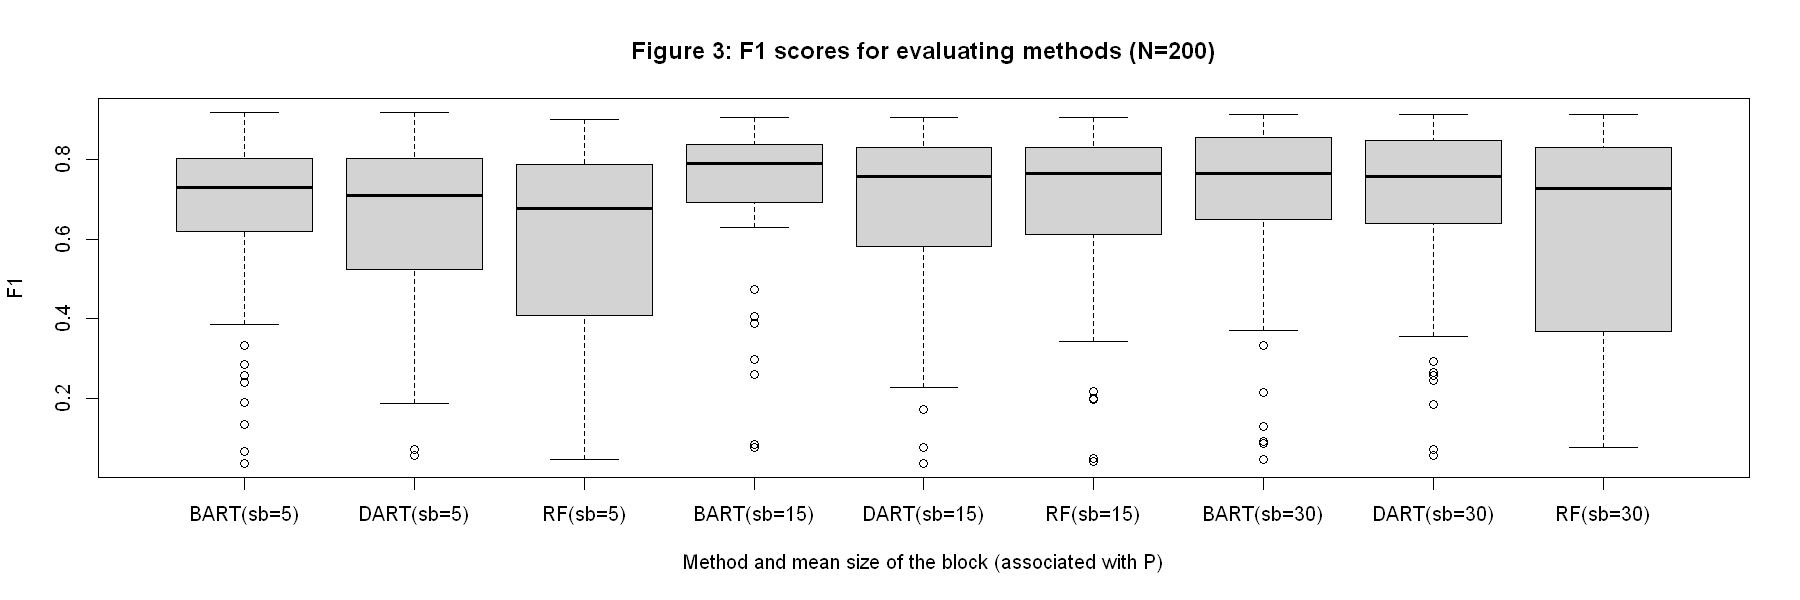

In [7]:
boxplot(ev5$F1BART[201:300],ev5$F1DART[201:300],ev5$F1RF[201:300],
        ev15$F1BART[201:300],ev15$F1DART[201:300],ev15$F1RF[201:300],
        ev30$F1BART[201:300],ev30$F1DART[201:300],ev30$F1RF[201:300],
        names = c("BART(sb=5)", "DART(sb=5)", "RF(sb=5)",
        "BART(sb=15)", "DART(sb=15)", "RF(sb=15)",
        "BART(sb=30)", "DART(sb=30)", "RF(sb=30)"),
       main="Figure 3: F1 scores for evaluating methods (N=200)",
        ylab="F1",
        xlab="Method and mean size of the block (associated with P)")

##### Table 3: Results of the simulation study for sb = 15 and associated P  ≈ 1500. The best result for each category is inside exclamation points.

In [8]:
result_table(simulations_res15)

,N=50,,,,N=100,,,,N=200,,,
,recall,precision,F1,accuracy,recall,precision,F1,accuracy,recall,precision,F1,accuracy
BART,0.4761,! 0.6373 !,! 0.721 !,0.6459,! 0.5664 !,0.6362,! 0.7676 !,! 0.6564 !,! 0.477 !,! 0.6532 !,! 0.7267 !,! 0.6661 !
DART,0.486,0.5966,0.6682,! 0.6478 !,0.5491,! 0.6418 !,0.6679,0.6508,0.4751,0.5995,0.6744,0.6597
RF,! 0.4871 !,0.5854,0.565,0.6458,0.5533,0.6125,0.6499,0.6509,0.4759,0.6067,0.6884,0.665


-------
Notebook by Aida Takhmazova

---